## IMDB with RNN

In [1]:
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [3]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# 등장한 단어 수
len(imdb.get_word_index())

1654784/1641221 [==============================] - 0s 0us/step


88584

In [5]:
# 리뷰 최대 길이, 평균 길이
max(len(s) for s in X_train), sum(map(len, X_train)) / len(X_train)

(2494, 238.71364)

#### LSTM Sentiment Analysis
- 단어 빈도수: 10,000 (총 88,584)
- 리뷰 단어수: 500 (최대 2,494)
- 최대 데이터 갯수 → 개별 학습
  - train: 25,000 valid: 10,000 test: 15,000

In [7]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Full Course
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, test_size=0.4, stratify=y_test
)

In [18]:
num_words = 10000
(X_train, y_train), (_, _) = imdb.load_data(num_words=num_words)

In [19]:
# Simple Course
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000,), (5000,), (20000,), (5000,))

In [20]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
X_train.shape, X_test.shape

((20000, 500), (5000, 500))

In [21]:
model = Sequential([
    Embedding(num_words, 100, input_length=max_len), # 10,000개의 단어를 100차원으로 축소
    LSTM(128),
    Dense(1, activation='sigmoid')
])
model.summary()
# Embedding shape (500, 100) = 500 단어, 100 개의 임베딩 vector 차원

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [23]:
model_path = './models/best-imdb-lstm.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=5)

In [24]:
hist = model.fit(
    X_train, y_train, validation_split=0.22,
    epochs=30, batch_size=64,callbacks=[mc, es]
)

Epoch 1/30
243/244 [============================>.] - ETA: 0s - loss: 0.4820 - accuracy: 0.7614
Epoch 00001: val_loss improved from inf to 0.33993, saving model to ./models\best-imdb-lstm.h5
244/244 [==============================] - 27s 60ms/step - loss: 0.4814 - accuracy: 0.7617 - val_loss: 0.3399 - val_accuracy: 0.8561
Epoch 2/30
243/244 [============================>.] - ETA: 0s - loss: 0.2569 - accuracy: 0.8992
Epoch 00002: val_loss improved from 0.33993 to 0.32649, saving model to ./models\best-imdb-lstm.h5
244/244 [==============================] - 13s 55ms/step - loss: 0.2568 - accuracy: 0.8991 - val_loss: 0.3265 - val_accuracy: 0.8686
Epoch 3/30
244/244 [==============================] - ETA: 0s - loss: 0.1990 - accuracy: 0.9254
Epoch 00003: val_loss did not improve from 0.32649
244/244 [==============================] - 13s 53ms/step - loss: 0.1990 - accuracy: 0.9254 - val_loss: 0.3880 - val_accuracy: 0.8611
Epoch 4/30
244/244 [==============================] - ETA: 0s - loss

In [25]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

157/157 [==============================] - 3s 20ms/step - loss: 0.3226 - accuracy: 0.8662


[0.32260990142822266, 0.8661999702453613]

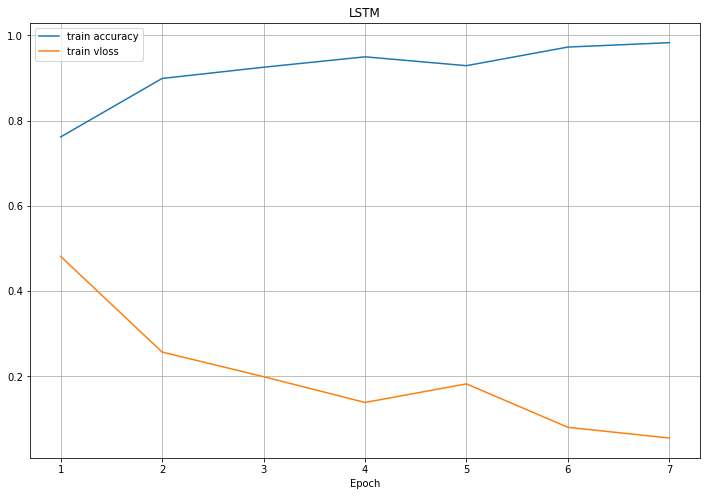

In [26]:
import matplotlib.pyplot as plt

y_acc = hist.history['accuracy']
y_loss = hist.history['loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_loss, label='train vloss')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('LSTM');

## IMDB Sentiment Analysis - Conv1D
- Conv1D + Conv1D + Dense (Case 1)
- Conv1D + LSTM + Dense (Case 2)
- Conv1D + Dense + Dense (Case 3)

In [34]:
# Global Maxpooling = Flatten + Maxpooling
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
num_words = 10000
(X_train, y_train), (_, _) = imdb.load_data(num_words=num_words)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000,), (5000,), (20000,), (5000,))

In [31]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
X_train.shape, X_test.shape

((20000, 500), (5000, 500))

#### Case 1) Conv1D x 2 

In [35]:
model_1 = Sequential([
    Embedding(num_words, 100, input_length=max_len),
    Dropout(0.5),
    Conv1D(64, 7, activation='relu'), # height = 7
    MaxPooling1D(7), # Conv1D 와 size를 맞춰줌
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(5),
    GlobalMaxPool1D(),
    Dense(1, activation='sigmoid')
])
model_1.summary()
# MaxPooling output = 494개의 행을 7개씩 나눠서 Max 값을 처리, 나머지 4개는 Maxpooling을 진행하지 않음

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 500, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 494, 64)           44864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 70, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 64)           0         
 1D)                                                  

In [43]:
model_1.compile('adam', 'binary_crossentropy',['accuracy'])

model_1_path = './models/best-imdb-conv1d.h5'
mc = ModelCheckpoint(model_1_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=5)

In [44]:
hist_1 = model_1.fit(
    X_train, y_train, validation_split=0.22,
    epochs=30, batch_size=64,callbacks=[mc, es]
)

Epoch 1/30
238/244 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 0.9949
Epoch 00001: val_loss improved from inf to 0.75492, saving model to ./models\best-imdb-conv1d.h5
244/244 [==============================] - 3s 8ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.7549 - val_accuracy: 0.8552
Epoch 2/30
237/244 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9980
Epoch 00002: val_loss did not improve from 0.75492
244/244 [==============================] - 2s 7ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.8336 - val_accuracy: 0.8534
Epoch 3/30
240/244 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9986
Epoch 00003: val_loss did not improve from 0.75492
244/244 [==============================] - 2s 7ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.8884 - val_accuracy: 0.8573
Epoch 4/30
240/244 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9982
Epoch 00004: val_loss di

In [45]:
best_model = load_model(model_1_path)
best_model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.7302 - accuracy: 0.8564


[0.7301812767982483, 0.8564000129699707]

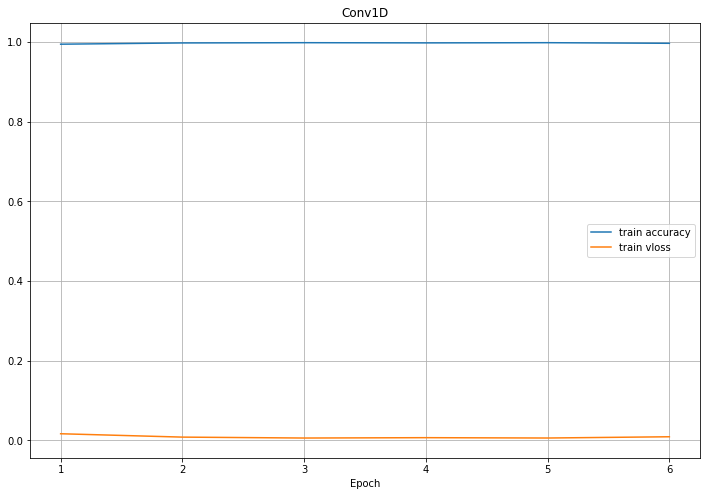

In [46]:
y_acc_1 = hist_1.history['accuracy']
y_loss_1 = hist_1.history['loss']
xs_1 = np.arange(1, len(y_acc_1)+1)

plt.figure(figsize=(12, 8))
plt.plot(xs_1, y_acc_1, label='train accuracy')
plt.plot(xs_1, y_loss_1, label='train vloss')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('Conv1D');

#### Case 2) Conv1D + LSTM

In [37]:
model_2 = Sequential([
    Embedding(num_words, 100, input_length=max_len),
    Dropout(0.5),
    Conv1D(64, 5, activation='relu'), # height = 7
    MaxPooling1D(5), # Conv1D 와 size를 맞춰줌
    LSTM(100),
    Dense(1, activation='sigmoid')
])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 dropout_1 (Dropout)         (None, 500, 100)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 496, 64)           32064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 100)               66000     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                      

In [47]:
model_2.compile('adam', 'binary_crossentropy',['accuracy'])

model_2_path = './models/best-imdb-conv1d+lstm.h5'
mc = ModelCheckpoint(model_2_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=5)

In [48]:
hist_2 = model_2.fit(
    X_train, y_train, validation_split=0.22,
    epochs=30, batch_size=64,callbacks=[mc, es]
)

Epoch 1/30
243/244 [============================>.] - ETA: 0s - loss: 0.4521 - accuracy: 0.7663
Epoch 00001: val_loss improved from inf to 0.29119, saving model to ./models\best-imdb-conv1d+lstm.h5
244/244 [==============================] - 6s 18ms/step - loss: 0.4516 - accuracy: 0.7666 - val_loss: 0.2912 - val_accuracy: 0.8850
Epoch 2/30
244/244 [==============================] - ETA: 0s - loss: 0.2269 - accuracy: 0.9120
Epoch 00002: val_loss improved from 0.29119 to 0.28493, saving model to ./models\best-imdb-conv1d+lstm.h5
244/244 [==============================] - 4s 17ms/step - loss: 0.2269 - accuracy: 0.9120 - val_loss: 0.2849 - val_accuracy: 0.8827
Epoch 3/30
244/244 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.9470
Epoch 00003: val_loss did not improve from 0.28493
244/244 [==============================] - 4s 16ms/step - loss: 0.1484 - accuracy: 0.9470 - val_loss: 0.3062 - val_accuracy: 0.8818
Epoch 4/30
243/244 [============================>.] - ETA

In [49]:
best_model = load_model(model_2_path)
best_model.evaluate(X_test, y_test)

157/157 [==============================] - 1s 5ms/step - loss: 0.2968 - accuracy: 0.8752


[0.2968238890171051, 0.8751999735832214]

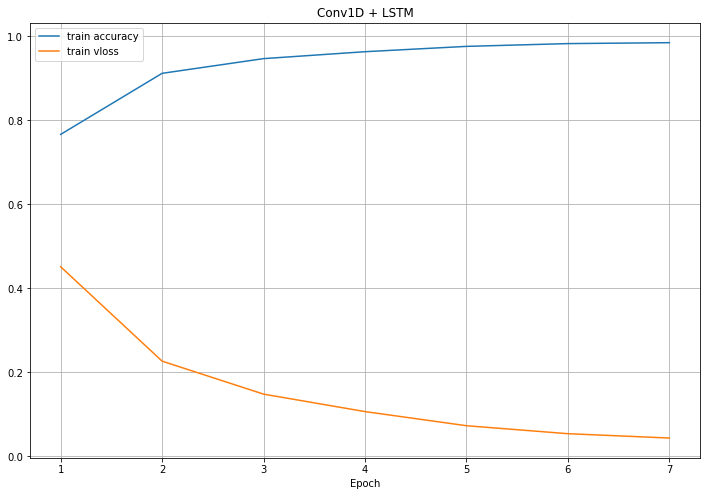

In [50]:
y_acc_2 = hist_2.history['accuracy']
y_loss_2 = hist_2.history['loss']
xs_2 = np.arange(1, len(y_acc_2)+1)

plt.figure(figsize=(12, 8))
plt.plot(xs_2, y_acc_2, label='train accuracy')
plt.plot(xs_2, y_loss_2, label='train vloss')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('Conv1D + LSTM');

#### Case 3) Conv1D + Dense

In [39]:
model_3 = Sequential([
    Embedding(num_words, 100, input_length=max_len),
    Dropout(0.5),
    Conv1D(64, 7, activation='relu'), # height = 7
    MaxPooling1D(7), # Conv1D 와 size를 맞춰줌
    GlobalMaxPool1D(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 dropout_2 (Dropout)         (None, 500, 100)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 494, 64)           44864     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 70, 64)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 100)              

In [51]:
model_3.compile('adam', 'binary_crossentropy',['accuracy'])

model_3_path = './models/best-imdb-conv1d+Dense.h5'
mc = ModelCheckpoint(model_3_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=5)

In [52]:
hist_3 = model_3.fit(
    X_train, y_train, validation_split=0.22,
    epochs=30, batch_size=64,callbacks=[mc, es]
)

Epoch 1/30
239/244 [============================>.] - ETA: 0s - loss: 0.5925 - accuracy: 0.6430
Epoch 00001: val_loss improved from inf to 0.39758, saving model to ./models\best-imdb-conv1d+Dense.h5
244/244 [==============================] - 2s 8ms/step - loss: 0.5887 - accuracy: 0.6469 - val_loss: 0.3976 - val_accuracy: 0.8282
Epoch 2/30
237/244 [============================>.] - ETA: 0s - loss: 0.3127 - accuracy: 0.8676
Epoch 00002: val_loss improved from 0.39758 to 0.31396, saving model to ./models\best-imdb-conv1d+Dense.h5
244/244 [==============================] - 2s 7ms/step - loss: 0.3126 - accuracy: 0.8676 - val_loss: 0.3140 - val_accuracy: 0.8645
Epoch 3/30
240/244 [============================>.] - ETA: 0s - loss: 0.2022 - accuracy: 0.9211
Epoch 00003: val_loss improved from 0.31396 to 0.30102, saving model to ./models\best-imdb-conv1d+Dense.h5
244/244 [==============================] - 2s 7ms/step - loss: 0.2014 - accuracy: 0.9215 - val_loss: 0.3010 - val_accuracy: 0.8811
Ep

In [53]:
best_model = load_model(model_3_path)
best_model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8820


[0.30093199014663696, 0.8820000290870667]

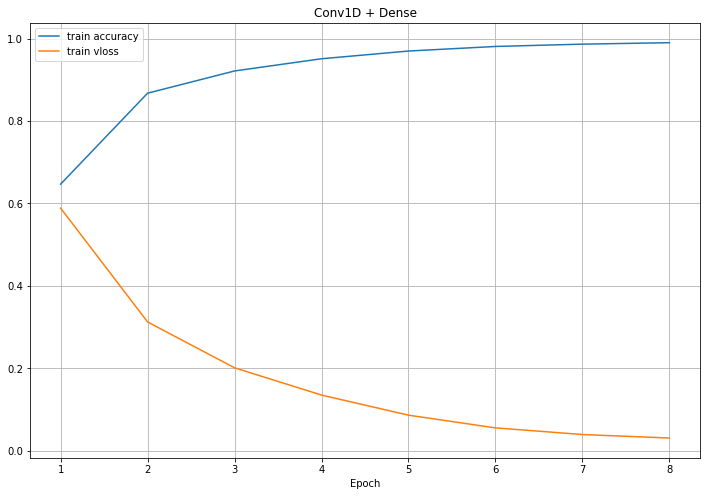

In [54]:
y_acc_3 = hist_3.history['accuracy']
y_loss_3 = hist_3.history['loss']
xs_3 = np.arange(1, len(y_acc_3)+1)

plt.figure(figsize=(12, 8))
plt.plot(xs_3, y_acc_3, label='train accuracy')
plt.plot(xs_3, y_loss_3, label='train vloss')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('Conv1D + Dense');